# 基于人口调查数据进行的数据分析与预测           


# 1.库的导入
 用到了一些python数据可视化的库，这些库为数据可视化提供了大量的工具，能够帮助我们直观的进行数据的分析与预测


In [4]:
import os
import requests
import matplotlib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# 2.数据的导入

In [5]:
names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]


data = pd.read_csv(r'C:\Users\84164\Desktop/census/adult.data', sep=",", names=names, engine = 'python') 
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# 未经数据预处理的数据样本数量为9365

# 3.数据预处理

In [6]:
data=data[(True^data['native-country'].isin([' ?']))&(True^data['education'].isin([' ?']))]
# data=data.dropna(axis=0, how='any', inplace=True)
data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9360,50,Private,150941,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,Black,Female,0.0,0.0,44.0,United-States,<=50K
9361,32,Private,303942,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
9362,27,Local-gov,273929,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
9363,38,Private,197077,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K


# 数据预处理后的数据集减少了167条缺陷数据

# 3.数据可视化

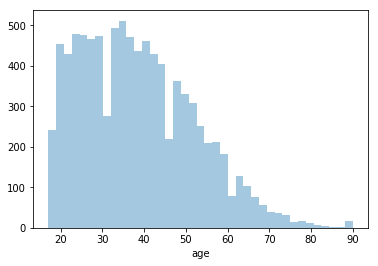

In [7]:
sns.distplot(data['age'], kde=False)

# 年龄分布的直方图，反映了调查人口中各个年龄的数量
# 上图反映调查人口的年纪分布比较均匀

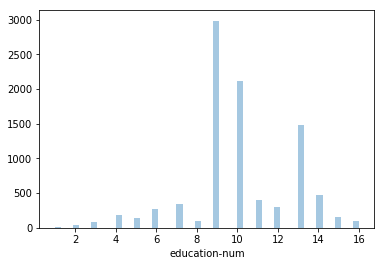

In [8]:
sns.distplot(data['education-num'], kde=False)

# 年龄受教育年数的直方图，反映了调查人口受教育教育的年数

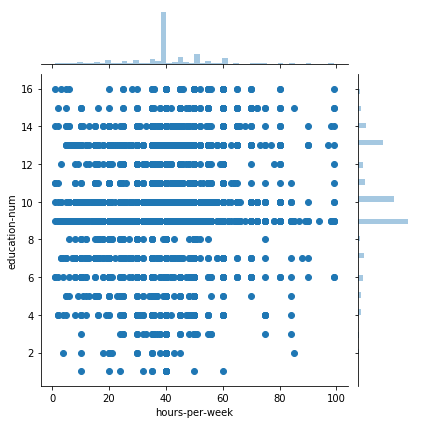

In [9]:
sns.jointplot(x = "hours-per-week" , y = "education-num", data = data)

# 联合分布图反映了数据样本中每星期的工作时间和受教育年数的关系
# 从上图可以看到，受教育的年数与每周的工作时长没有很大的关系

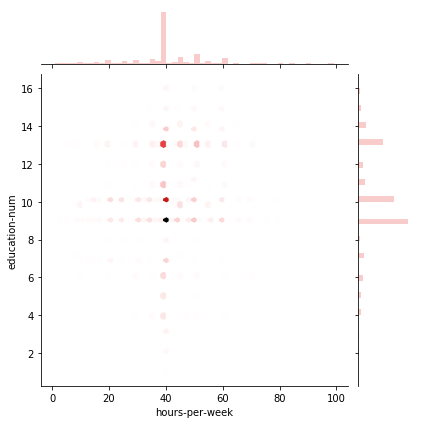

In [10]:
sns.jointplot(x = "hours-per-week", y ="education-num",data=data, kind="hex",color="lightcoral")


# 反映了数据样本中每星期的工作时间和受教育年数在那些点上是强相关的
# 从上图可以看到强相关的点不是很多，表明了受教育年数和每周的工作时长没有很大的关系

In [11]:
man=0
woman=0
others=0
p=0
#统计收入小于50K+男女比例
income = data['income'].values
sex = data['sex'].values

a=[income]
b=[sex]
# print(b)
#print(b[0][5])
#print(a[0][8])
for i in range(len(a[0])):
        if(a[0][i]==' <=50K'):
            p=p+1
            if(b[0][i]==' Male'):
                man+=1
            elif(b[0][i]==' Female'):
                woman+=1
            else:
                others+=1
print(len(a[0]))
print(p)
print(man)
print(woman)
print(man/p)       
print(woman/p) 
print(others/p) 



9198
6995
4305
2690
0.6154395997140815
0.38456040028591854
0.0


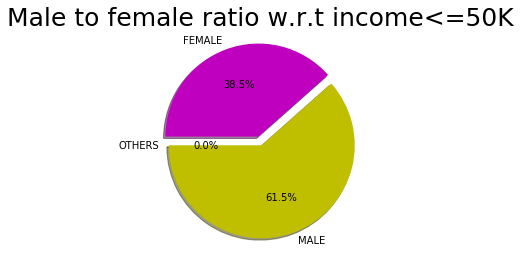

In [12]:
labels=['MALE','FEMALE','OTHERS']
values=[man,woman,others]
colors=['y','m','b']
explode=[0,0.1,0]
#旋转角度
plt.title("Male to female ratio w.r.t income<=50K",fontsize=25)
#标题
plt.pie(values,labels=labels,explode=explode,colors=colors,startangle = 180,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# 反映了收入小于等于50K的人群的男女比例
# 收入小于50K的人群中男性占大多数

In [13]:
man=0
woman=0
others=0
m=0
#统计收入小于50K+男女比例
income = data['income'].values
sex = data['sex'].values

a=[income]
b=[sex]
# print(b)
#print(b[0][5])
#print(a[0][8])
for i in range(len(a[0])):
        if(a[0][i]==' >50K'):
            m=m+1
            if(b[0][i]==' Male'):
                man+=1
            elif(b[0][i]==' Female'):
                woman+=1
            else:
                others+=1
print(m)
print(man)
print(woman)
print(man/m)       
print(woman/m) 
print(others/m) 

2202
1856
346
0.8428701180744778
0.15712988192552224
0.0


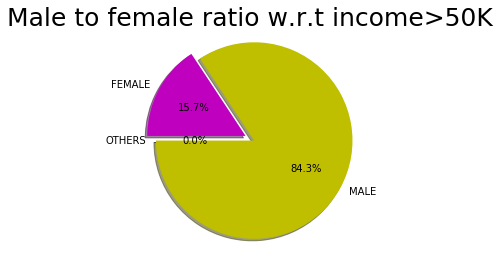

In [14]:
labels=['MALE','FEMALE','OTHERS']
values=[man,woman,others]
colors=['y','m','b']
explode=[0,0.1,0]
#旋转角度
plt.title("Male to female ratio w.r.t income>50K",fontsize=25)
#标题
plt.pie(values,labels=labels,explode=explode,colors=colors,startangle = 180,shadow=True,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# 反映了收入大于50K的人群的男女比例
# 和收入小于50K的人群相比，收入大于50K的人群中，女性所占比例减小，反映了高收入人群中，男性占大都数

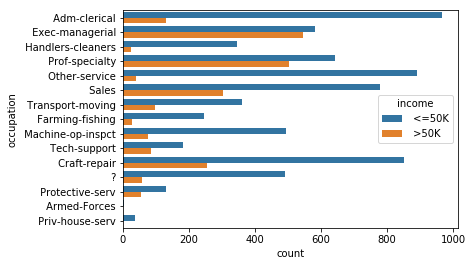

In [15]:
ax = sns.countplot(y='occupation', hue='income', data=data,)

# 反映了各个不同职业的收入情况
# 在收入大于50K的人群中，管理层的人数最多

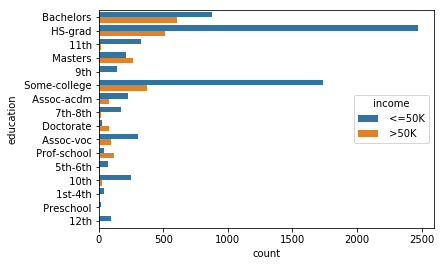

In [16]:
ax = sns.countplot(y='education', hue='income', data=data,)

# 反映了各个不同学历的收入情况
# 在收入大于50K的人群中，学历是本科生的人数最多

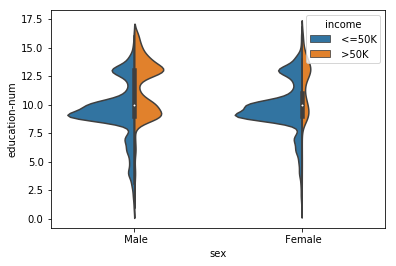

In [17]:
sns.violinplot(x='sex', y='education-num', hue='income', data=data, split=True, scale='count')

# 反映了不同受教育年数男女的收入情况

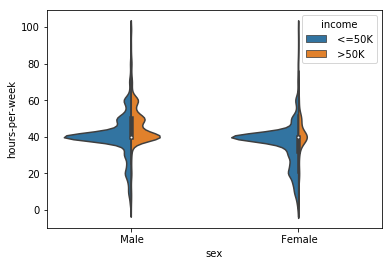

In [18]:
sns.violinplot(x='sex', y='hours-per-week', hue='income', data=data, split=True, scale='count')

# 反映了不同的周工作时间的男女的收入情况

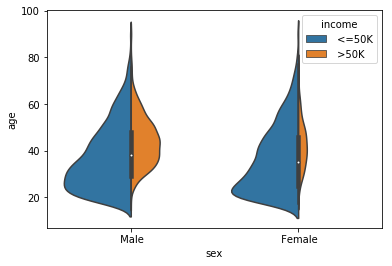

In [19]:
sns.violinplot(x='sex', y='age', hue='income', data=data, split=True, scale='count')

# 反映了不同年龄的男女的收入情况

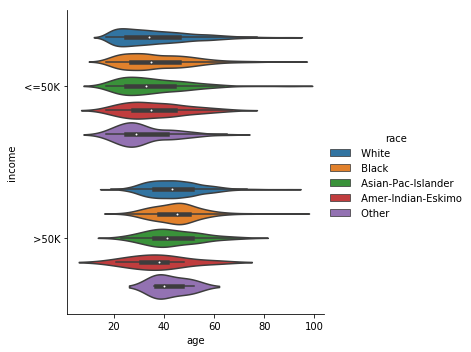

In [20]:
g = sns.catplot(x="age", y="income", hue="race",data=data, kind="violin")

# 反映了不同族群在年龄和薪水方面的关系

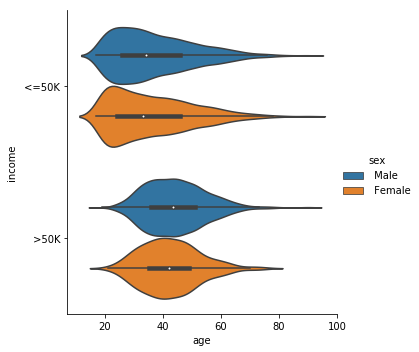

In [21]:
g = sns.catplot(x="age", y="income", hue="sex",data=data, kind="violin")

# 反映了不同性别在年龄和薪水方面的关系

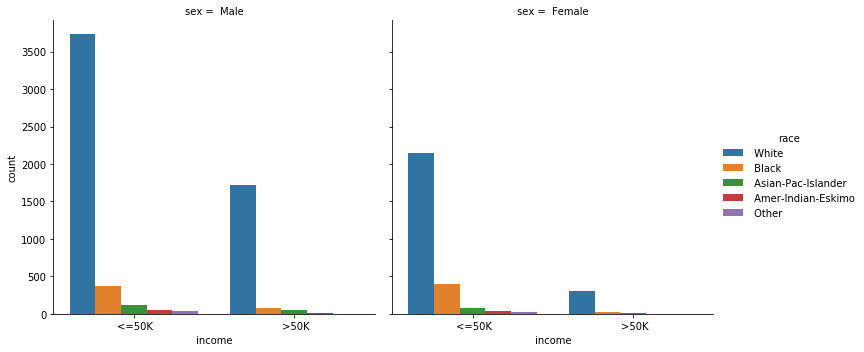

In [22]:
g = sns.catplot("income", hue="race",col="sex", data=data, kind = 'count')

# 反映了数据样本中族群、性别、收入三者的关系

# 4. 数据预测

# 使用knn算法，针对年龄，受教育年数和每周工作时长，对调查人口进行收入预测

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [24]:
dataX=data[['age','education-num','hours-per-week']]
# print(dataX)
print(dataX.shape)

(9198, 3)


In [25]:
datay=data[['income']]
#print(income)
print(datay.shape)

(9198, 1)


In [26]:
train_X , test_X, train_y ,test_y = train_test_split(dataX, datay, test_size=0.2,random_state=0)

In [27]:
print(train_X.shape)
print(test_X.shape)
print(train_y.shape)
print(test_y.shape)

(7358, 3)
(1840, 3)
(7358, 1)
(1840, 1)


In [28]:
knn =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
     metric_params=None, n_jobs=1, n_neighbors=5, p=2,weights='uniform')

In [29]:
train_X.dropna(inplace=True)
test_X.dropna(inplace=True)
train_y.dropna(inplace=True)
test_y.dropna(inplace=True)
knn.fit(train_X, train_y)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anacond

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
predict_result = knn.predict(test_X)
print(predict_result)

[' <=50K' ' <=50K' ' >50K' ... ' <=50K' ' >50K' ' <=50K']


# 将原census数据集分成训练集和测试集，在测试集上进行预测
# 预测的精度(ACC) = 0.7592

In [31]:
print(knn.score(test_X, test_y))

0.7592391304347826


# 使用knn算法，针对年龄，每周工作时长，对调查人口进行收入预测

In [40]:
dataX=data[['age','hours-per-week']]
# print(dataX)
print(dataX.shape)

(9198, 2)


In [41]:
datay=data[['income']]
#print(income)
print(datay.shape)

(9198, 1)


In [42]:
train_X , test_X, train_y ,test_y = train_test_split(dataX, datay, test_size=0.2,random_state=0)

In [43]:
knn =KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
     metric_params=None, n_jobs=1, n_neighbors=5, p=2,weights='uniform')

In [44]:
train_X.dropna(inplace=True)
test_X.dropna(inplace=True)
train_y.dropna(inplace=True)
test_y.dropna(inplace=True)
knn.fit(train_X, train_y)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anacond

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [45]:
predict_result = knn.predict(test_X)
print(predict_result)

[' <=50K' ' <=50K' ' >50K' ... ' <=50K' ' <=50K' ' <=50K']


# 将原census数据集分成训练集和测试集，在测试集上进行预测
# 预测的精度(ACC) = 0.7288

In [46]:
print(knn.score(test_X, test_y))

0.7288043478260869
